<a href="https://colab.research.google.com/github/MIDID/AI-ML_INTERSHIP_TASK_4/blob/main/Logic%20Regressionipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving data.csv to data.csv
✅ Dataset loaded successfully!
Shape: (569, 33)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

🕵 Checking for missing values...
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean   

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



🎯 Target variable distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

📄 Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



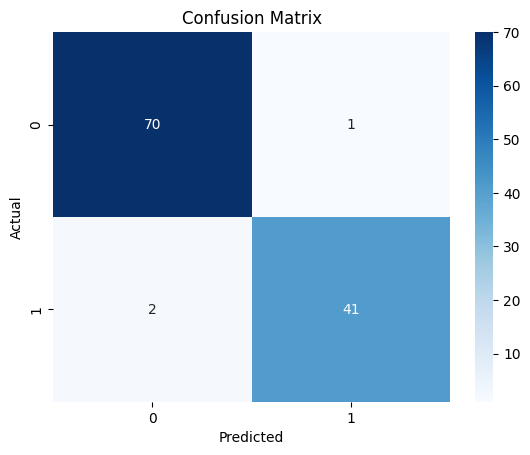

Precision: 0.9762
Recall:    0.9535


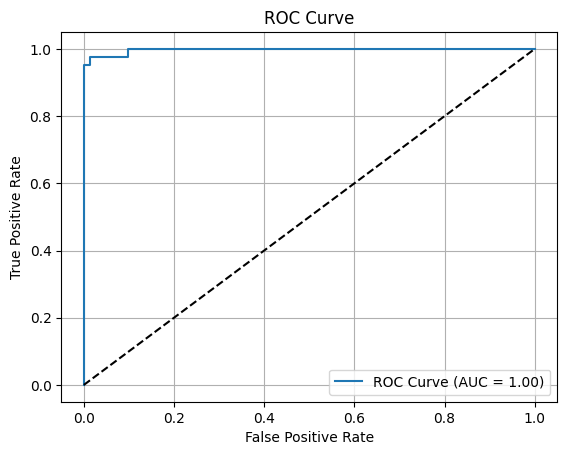

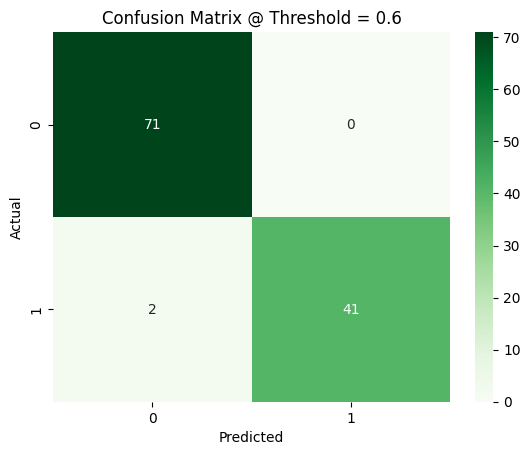

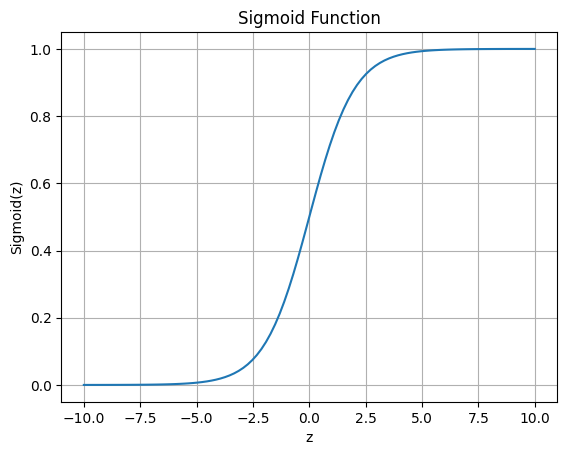

In [1]:
# 🚀 Logistic Regression Binary Classification - Task 4

# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_score, recall_score
)

# 📥 Step 2: Upload Dataset
from google.colab import files
uploaded = files.upload()

# Load the first uploaded file
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# 🧼 Step 3: Preprocessing
print("\n🕵 Checking for missing values...")
print(df.isnull().sum())

# Drop the 'Unnamed: 32' column
df.drop('Unnamed: 32', axis=1, inplace=True)
print("📉 After dropping 'Unnamed: 32', shape:", df.shape)

# Display few rows
display(df.head())

# 🔍 Step 4: Feature and Target Selection
# Assuming the 'diagnosis' column is the target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Ensure target is binary
print("\n🎯 Target variable distribution:")
print(y.value_counts())

# 🧪 Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📏 Step 6: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Step 7: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 🔮 Step 8: Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# 🧾 Step 9: Evaluation
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🎯 Precision & Recall
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

# 📈 ROC Curve
# Convert target to numerical for roc_curve
y_test_numerical = y_test.apply(lambda x: 1 if x == 'M' else 0)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_numerical, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# 🎚 Threshold Tuning (e.g., 0.6)
threshold = 0.6
y_pred_custom = (y_proba > threshold).astype(int)
cm_custom = confusion_matrix(y_test_numerical, y_pred_custom)

sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix @ Threshold = {threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🔄 Sigmoid Function Plot
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()